In [78]:
#https://keras.io/examples/vision/mnist_convnet/

In [79]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [80]:
mnist =tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

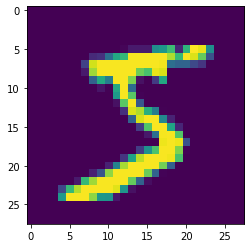

In [81]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [82]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [83]:
x_train[0].shape

(28, 28)

In [84]:
for data, labels in mnist.load_data():
    print(data.shape)
    print(data.dtype)
    print(labels.shape)
    print(labels.dtype)
    break

(60000, 28, 28)
uint8
(60000,)
uint8


In [85]:
#normalization
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

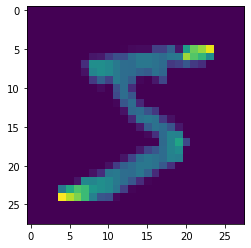

In [86]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [87]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [88]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
#model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#optim= tf.keras.optimizers.Adam(learning_rate=0.01)
#model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10,validation_split=0.2, batch_size=16, shuffle=True)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3000/3000 [==============================] - 5s 2ms/step - loss: 0.3684 - accuracy: 0.8997 - val_loss: 0.2200 - val_accuracy: 0.9454
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2307 - accuracy: 0.9421 - val_loss: 0.2434 - val_accuracy: 0.9404
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2007 - accuracy: 0.9504 - val_loss: 0.2915 - val_accuracy: 0.9055
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 

In [92]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.9511


In [94]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
#model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
optim= tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10,validation_split=0.2, batch_size=16, shuffle=True)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3000/3000 [==============================] - 5s 2ms/step - loss: 0.3724 - accuracy: 0.8998 - val_loss: 0.2287 - val_accuracy: 0.9417
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2279 - accuracy: 0.9418 - val_loss: 0.2065 - val_accuracy: 0.9473
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2043 - accuracy: 0.9505 - val_loss: 0.1929 - val_accuracy: 0.9554
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 

In [95]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.9551


In [96]:
#model.save('name.model')
#tf.keras.models.load_model('name.model')
predictions = model.predict(x_test, batch_size=16)

In [97]:
np.argmax(predictions[0])

7

In [ ]:
#slightly different approach to batching
#representing input
#representing output
#different vector representations
#different methods of representing a problem

In [98]:
num_classes = 10
input_shape = (28,28,1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [99]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [100]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [101]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [102]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
#expand_dims ~ unsqueeze

In [103]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [104]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [105]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [106]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)              

In [107]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 16s 39ms/step - loss: 0.3742 - accuracy: 0.8844 - val_loss: 0.0845 - val_accuracy: 0.9765
Epoch 2/15
422/422 [==============================] - 16s 39ms/step - loss: 0.1165 - accuracy: 0.9636 - val_loss: 0.0606 - val_accuracy: 0.9825
Epoch 3/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.0511 - val_accuracy: 0.9862
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0740 - accuracy: 0.9767 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0636 - accuracy: 0.9796 - val_loss: 0.0394 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0566 - accuracy: 0.9817 - val_loss: 0.0373 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0523 - accuracy: 0.9832 - val_loss: 0.0352 - val_accuracy:

In [108]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026390383020043373
Test accuracy: 0.9909999966621399


YOU CAN ALSO USE THE MODEL CLASS CONSTRUCT CONVENTION

In [ ]:
class Hidden3Layer_MLP_Flattened_Image_Net(tf.keras.Model):
    def __init__(self):
        super(Hidden3Layer_MLP_Flattened_Image_Net, self).__init__()
        self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
        self.dropout = tf.keras.layers.Dropout(0.5)
        
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        if training:
            x = self.dropout(x, training=training)
        out = self.dense2(x)
        return out
    
model = Hidden3Layer_MLP_Flattened_Image_Net()

optim= tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optim)
#model.compile(loss='categorical_crossentropy', optimizer='adam')